In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
#Load File
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#shape
data.shape

(541909, 8)

In [4]:
#data type
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
#Descriptive statistics
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data_filter = data[(data['UnitPrice']>0) & (data['Quantity']>0)]
data_filter

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


1. Perform a preliminary data inspection and data cleaning.

	Check for missing data and formulate an apt strategy to treat them.

In [7]:
data_filter.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [8]:
#in percent
(data_filter.isna().sum()/len(data_filter))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.942275
Country         0.000000
dtype: float64

In [9]:
data_nomiss = data_filter[data_filter['CustomerID'].isnull()==False]
data_nomiss

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Remove duplicate data records.

In [10]:
data_new = data_nomiss.drop_duplicates()
warnings.filterwarnings('ignore')
data_new['CustomerID']=data_new['CustomerID'].astype('int64')
data_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


Perform descriptive analytics on the given data.

In [11]:
data_new.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


Data Transformation:

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts. 

Create month cohorts and analyze active customers for each cohort.

1. Assigned the cohorts and calculated the monthly offset

In [12]:
import datetime as dt
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
warnings.filterwarnings('ignore')
# Create transaction_date column based on month and store in TransactionMonth
data_new['TransactionMonth']=data_new['InvoiceDate'].apply(get_month)
# Grouping by CustomerID and select the InvoiceMonth value
grouping = data_new.groupby('CustomerID')['TransactionMonth']
# Assigning a minimum InvoiceMonth value to the dataset
data_new['CohortMonth']=grouping.transform('min')
# printing top 5 rows
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01


2. Calculating time offset in Month as Cohort Index

In [13]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(data_new, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(data_new, 'CohortMonth')

In [14]:
#  Get the  difference in years
year_diff = transcation_year-cohort_year
# Calculate difference in months
month_diff = transaction_month-cohort_month
warnings.filterwarnings('ignore')
#Calculate cohort index
data_new['CohertIndex']=year_diff *12 + month_diff + 1
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionMonth,CohortMonth,CohertIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1


In [15]:
#Create a Cohort Table
grouping = data_new.groupby(['CohortMonth', 'CohertIndex'])
#Number unique customer id falling in each cohort month and index
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data=cohort_data.reset_index()
cohort_data

,CohortMonth,CohertIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,323
89,2011-11-01,2,36


In [16]:
#Pivot table for cohort
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohertIndex', values='CustomerID')
cohort_counts

CohertIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#calculate retantion rate
cohort_sizes = cohort_counts.iloc[:,0]
retention_rate = round(cohort_counts.divide(cohort_sizes, axis=0), 3)*100
retention_rate

CohertIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


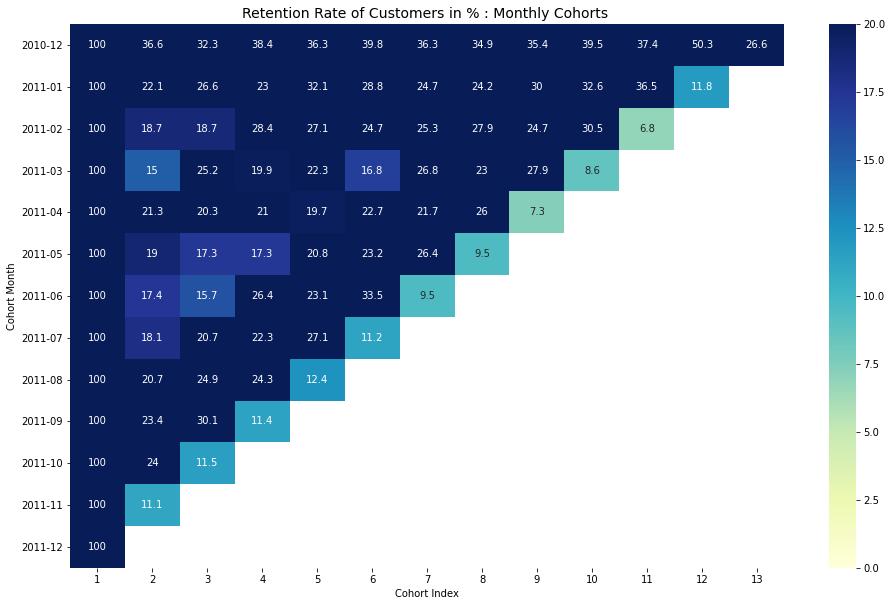

In [18]:
import seaborn as sbn
import matplotlib.pyplot as plt
retention_rate.index = retention_rate.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Retention Rate of Customers in % : Monthly Cohorts ', fontsize = 14)
# Creating the heatmap
sbn.heatmap(retention_rate, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation = 360)
plt.show()

3. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

4. Calculate RFM metrics.

In [19]:
#Calculate recency
warnings.filterwarnings('ignore')
data_new['Purchase']=data_new['Quantity']*data_new['UnitPrice']
last_date = data_new['InvoiceDate'].dt.date.max()
Recency_data = pd.DataFrame(((last_date-data_new.groupby('CustomerID').agg({'InvoiceDate': 'max'})['InvoiceDate'].dt.date) / np.timedelta64(1, 'D')).astype('int64')+1)
Recency_data

,InvoiceDate
CustomerID,
12346,326
12347,3
12348,76
12349,19
12350,311
...,...
18280,278
18281,181
18282,8


In [20]:
#Calculate Moetary and Frequency
Monetary_Frequency = data_new.groupby('CustomerID').agg({'Purchase': 'sum', 'CustomerID':'count'})
Monetary_Frequency

,Purchase,CustomerID
CustomerID,,
12346,77183.60,1
12347,4310.00,182
12348,1797.24,31
12349,1757.55,73
12350,334.40,17
...,...,...
18280,180.60,10
18281,80.82,7
18282,178.05,12


In [21]:
RFM_data = pd.concat([Recency_data, Monetary_Frequency], axis=1)
RFM_data.columns=['Recency', 'Monetary', 'Frequency']
RFM_data.reset_index(drop=False, inplace=True)
RFM_data

,CustomerID,Recency,Monetary,Frequency
0,12346,326,77183.60,1
1,12347,3,4310.00,182
2,12348,76,1797.24,31
3,12349,19,1757.55,73
4,12350,311,334.40,17
...,...,...,...,...
4333,18280,278,180.60,10
4334,18281,181,80.82,7
4335,18282,8,178.05,12
4336,18283,4,2045.53,721


5. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

	Combine three ratings to get a RFM segment (as strings).
    Get the RFM score by adding up the three ratings.

	Analyze the RFM segments by summarizing them and comment on the findings.

In [22]:
rfm_segment=RFM_data[['CustomerID', 'Recency', 'Monetary', 'Frequency']]
r_labels = range(4,0,-1)
r_quartiles, bins=pd.qcut(rfm_segment['Recency'], 4, labels=r_labels, retbins=True)
rfm_segment=rfm_segment.assign(R=r_quartiles.values)
f_labels = range(1,5)
f_quartiles, bins=pd.qcut(rfm_segment['Frequency'].rank(method='first'), 4, labels=f_labels, retbins=True)
rfm_segment=rfm_segment.assign(F=f_quartiles.values)
m_labels = range(1,5)
m_quartiles, bins=pd.qcut(rfm_segment['Monetary'], 4, labels=f_labels, retbins=True)
rfm_segment=rfm_segment.assign(M=m_quartiles.values)
rfm_segment['score']=rfm_segment.loc[:,['R', 'F', 'M']].sum(axis=1)
segment=[]
for i, j, k in zip(rfm_segment['R'], rfm_segment['F'], rfm_segment['M']):
    segment.append(''.join(str(i)+str(j)+str(k)))
rfm_segment['segment']=segment
rfm_segment

,CustomerID,Recency,Monetary,Frequency,R,F,M,score,segment
0,12346,326,77183.60,1,1,1,4,6,114
1,12347,3,4310.00,182,4,4,4,12,444
2,12348,76,1797.24,31,2,2,4,8,224
3,12349,19,1757.55,73,3,3,4,10,334
4,12350,311,334.40,17,1,1,2,4,112
...,...,...,...,...,...,...,...,...,...
4333,18280,278,180.60,10,1,1,1,3,111
4334,18281,181,80.82,7,1,1,1,3,111
4335,18282,8,178.05,12,4,1,1,6,411
4336,18283,4,2045.53,721,4,4,4,12,444


Project Task: Week 2

Data Modeling :

1. Create clusters using k-means clustering algorithm.

	Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.


In [23]:
data = rfm_segment[['Recency', 'Monetary', 'Frequency']]

Recency 1.2458256565113601
Monetary 19.339367981525175
Frequency 18.043529536033585


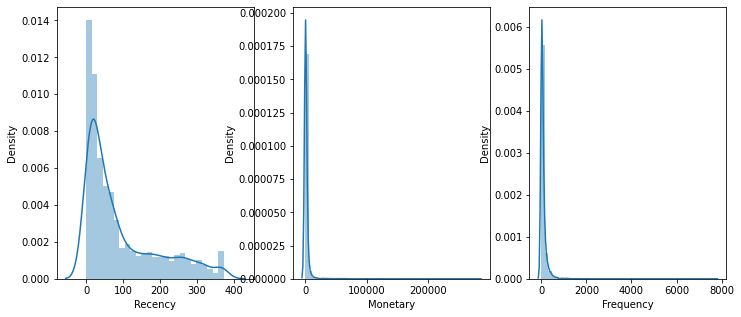

In [24]:
import matplotlib.pyplot as plt
import seaborn as sbn
fig, ax = plt.subplots(1,3, figsize=(12,5))
for i, j in enumerate(data.columns):
    print(j, data[j].skew())
    warnings.filterwarnings('ignore')
    sbn.distplot(data[j], ax=ax[i])

Recency -0.06337218714431152
Monetary -0.015717745878308126
Frequency 0.004464996631685107


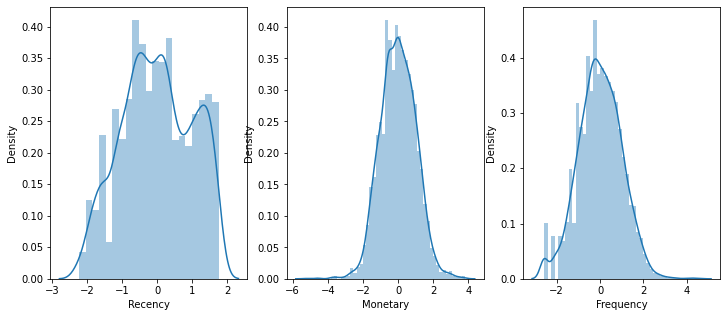

In [25]:
from sklearn.preprocessing import PowerTransformer
pt  = PowerTransformer('box-cox')
fig, ax = plt.subplots(1,3, figsize=(12,5))
data_trans = data.copy()
for i, j in enumerate(data.columns):
    data_trans[j]=pt.fit_transform(data[[j]])
    print(j, data_trans[j].skew())
    warnings.filterwarnings('ignore')
    sbn.distplot(data_trans[j], ax=ax[i])  

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in data.columns:
    data_trans[i]=ss.fit_transform(data_trans[[i]])

Decide the optimum number of clusters to be formed.

In [27]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [28]:
kmean  = KMeans()
visualizer = KElbowVisualizer(kmean, k=(4,9), metric='silhouette', timings=False)

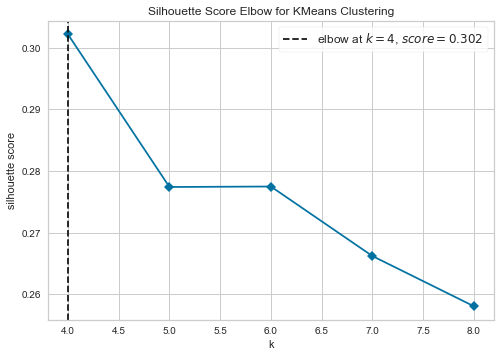

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
visualizer.fit(data_trans)
visualizer.show()

In [30]:
cost_error = pd.DataFrame()
cost_error['Number of Clusters']=range(4,9)
cost_error['Scores']=visualizer.k_scores_
warnings.filterwarnings('ignore')
cost_error.to_excel("cost_error.xls", index=False)

k=4 has high Silhouette Score. So we choose optimum number of cluster 4.

In [31]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_trans)
kmeans.labels_

array([1, 0, 1, ..., 3, 0, 1])

In [32]:
rfm_segment['clusters']=kmeans.labels_

In [33]:
rfm_segment[rfm_segment['clusters']==0]

,CustomerID,Recency,Monetary,Frequency,R,F,M,score,segment,clusters
1,12347,3,4310.00,182,4,4,4,12,444,0
3,12349,19,1757.55,73,3,3,4,10,334,0
9,12356,23,2811.43,59,3,3,4,10,334,0
10,12357,34,6207.67,131,3,4,4,11,344,0
12,12359,58,6310.03,245,2,4,4,10,244,0
...,...,...,...,...,...,...,...,...,...,...
4307,18241,10,2073.09,104,4,4,4,12,444,0
4309,18245,8,2567.06,175,4,4,4,12,444,0
4317,18257,40,2337.63,118,3,4,4,11,344,0
4327,18272,3,3078.58,166,4,4,4,12,444,0


In [34]:
rfm_segment[rfm_segment['clusters']==1]

,CustomerID,Recency,Monetary,Frequency,R,F,M,score,segment,clusters
0,12346,326,77183.60,1,1,1,4,6,114,1
2,12348,76,1797.24,31,2,2,4,8,224,1
5,12352,37,2506.04,85,3,3,4,10,334,1
7,12354,233,1079.40,58,1,3,3,7,133,1
13,12360,53,2662.06,129,2,4,4,10,244,1
...,...,...,...,...,...,...,...,...,...,...
4318,18259,25,2338.60,42,3,3,4,10,334,1
4319,18260,173,2628.35,133,1,4,4,9,144,1
4322,18263,26,1213.16,61,3,3,3,9,333,1
4323,18265,73,801.51,46,2,3,3,8,233,1


In [35]:
rfm_segment[rfm_segment['clusters']==2]

,CustomerID,Recency,Monetary,Frequency,R,F,M,score,segment,clusters
4,12350,311,334.40,17,1,1,2,4,112,2
6,12353,205,89.00,4,1,1,1,3,111,2
8,12355,215,459.40,13,1,1,2,4,112,2
14,12361,288,189.90,10,1,1,1,3,111,2
18,12365,292,641.38,22,1,2,2,5,122,2
...,...,...,...,...,...,...,...,...,...,...
4325,18269,367,168.60,7,1,1,1,3,111,2
4331,18277,59,110.38,8,2,1,1,4,211,2
4332,18278,74,173.90,9,2,1,1,4,211,2
4333,18280,278,180.60,10,1,1,1,3,111,2


In [36]:
rfm_segment[rfm_segment['clusters']==3]

,CustomerID,Recency,Monetary,Frequency,R,F,M,score,segment,clusters
11,12358,2,1168.06,19,4,2,3,9,423,3
19,12367,5,168.90,11,4,1,1,6,411,3
24,12374,26,742.93,33,3,2,3,8,323,3
25,12375,11,457.50,17,4,1,2,7,412,3
32,12384,29,585.27,27,3,2,2,7,322,3
...,...,...,...,...,...,...,...,...,...,...
4326,18270,39,283.15,11,3,1,1,5,311,3
4328,18273,3,204.00,3,4,1,1,6,411,3
4329,18274,31,175.92,11,3,1,1,5,311,3
4330,18276,44,335.86,14,3,1,2,6,312,3


0-Recently active customers spent more money and frequently visited.

1-Not active customers spent more money and visited less frequently.

2-Not active customers spent less money and did not frequently visit.

3-Active customers spent less money and did not frequently visit.

In [37]:
rfm_segment.to_csv("rfm_values.csv", index=False)

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 
https://public.tableau.com/app/profile/diana.laveena.dsouza/viz/Retail_Projects/RetailAnalysis?publish=yes